In [3]:
%matplotlib widget
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import timeit
from mpl_toolkits import mplot3d
from tqdm import tqdm, trange
from scipy import interpolate


In [2]:
os.system("g++ ./ans.cpp -std=c++14 -o ans")
if not os.path.exists("output"):
    os.makedirs("output")

In [4]:
def test(a, b, file = "out"):
    start = timeit.default_timer()
    os.system(f"./ans random {a} {b} ./output/{file}")
    stop = timeit.default_timer()
    return stop - start
test(20, 20)

0.002242260000002716

In [33]:
siz = 1+10000

xdata = np.arange(1,siz,siz//50)
ydata = np.arange(1,siz,siz//50)
X,Y = np.meshgrid(xdata,ydata)
Z = np.zeros_like(X, dtype=float)

In [34]:
for ux, vx in tqdm(enumerate(xdata)):
    for uy, vy in enumerate(ydata):
        Z[ux, uy] = test(vx, vy, f"id_{vx}_{vy}")

50it [19:47, 23.75s/it]


In [35]:
f = interpolate.interp2d(xdata, ydata, Z, kind='cubic')

xnew = np.arange(1,siz,1)
ynew = np.arange(1,siz,1)
Z = f(xnew, ynew)
X,Y = np.meshgrid(xnew,ynew)

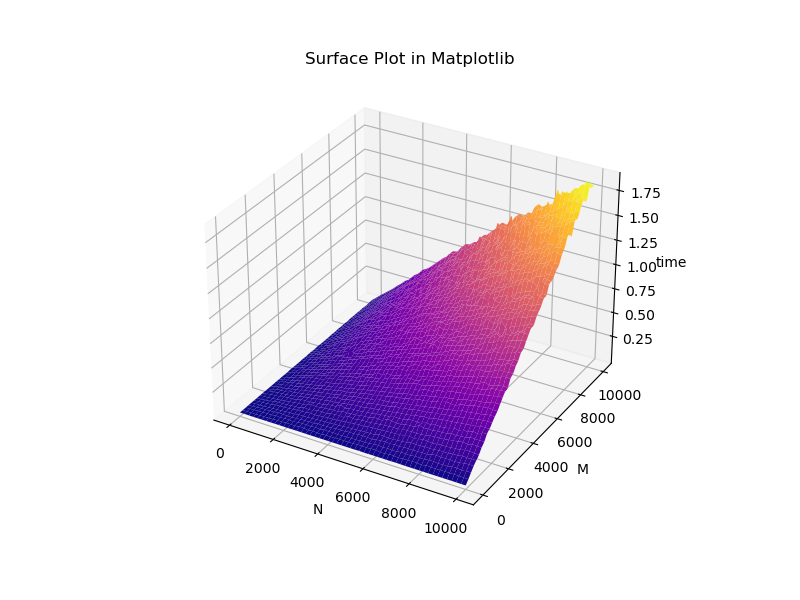

In [36]:
fig = plt.figure(figsize=(8,6))
ax3d = plt.axes(projection="3d")
ax3d.plot_surface(X, Y, Z,cmap='plasma')
ax3d.set_title('Surface Plot in Matplotlib')
ax3d.set_xlabel('N')
ax3d.set_ylabel('M')
ax3d.set_zlabel('time')
plt.show()